# Import The Required Libraries

In [3]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import seaborn as sb
import numpy as np

# Load The Dataset Using Pandas

In [4]:
dataset = pd.read_csv('penguins.csv')

# Just A Glimpse Of The Dataset

In [5]:
dataset.head()

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


# To Get The Numbers Of Row & Column

In [6]:
dataset.shape

(344, 9)

# To Get Some Information About The Dataset

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


So, there are 9 columns, 344 entries, data types are of float, int & object

# Analysis On Data

# About species Attribute

In [8]:
 dataset['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

<AxesSubplot:xlabel='species', ylabel='count'>

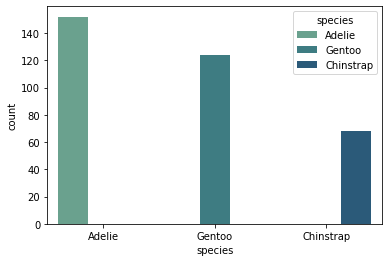

In [9]:
sb.countplot('species',hue='species',data=dataset, palette="crest")

we can make out that Adelie > Gentoo > Chinstrap in numbers

# About island Attribute

In [10]:
dataset['island'].value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

<AxesSubplot:xlabel='island', ylabel='count'>

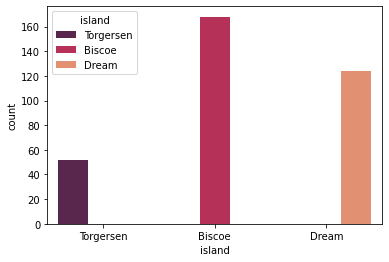

In [11]:
sb.countplot('island',hue='island',data=dataset,palette="rocket")

# About sex Attribute

In [12]:
dataset['sex'].value_counts()

male      168
female    165
Name: sex, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

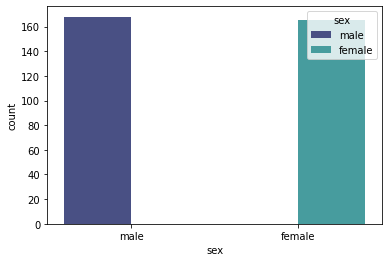

In [13]:
sb.countplot('sex',hue='sex',data=dataset,palette='mako')

Male ratio is a bit high than Female

# About Year Attribute

In [14]:
dataset['year'].value_counts()

2009    120
2008    114
2007    110
Name: year, dtype: int64

<AxesSubplot:xlabel='year', ylabel='count'>

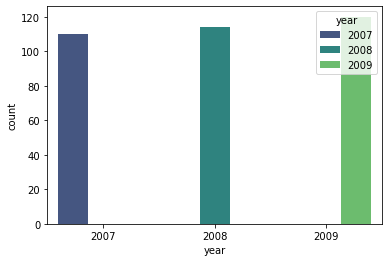

In [15]:
sb.countplot('year',hue='year',data=dataset,palette='viridis')

# Data Cleaning Process

# To Check If There Is Any Missing Value

In [16]:
dataset.isnull().sum()

Unnamed: 0            0
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

As, there is less numbers of null values. So, we can drop it 

In [17]:
dataset.dropna(inplace=True)

In [18]:
dataset.isnull().sum()

Unnamed: 0           0
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64

So, successfully i have dropped the null values

# Feature Engineering

convert object data type into numeric

In [19]:
dataset['species'].unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

In [20]:
dataset['data_species'] = dataset['species'].map(
{
    'Adelie' : 0,
    'Gentoo' : 1,
    'Chinstrap' : 2
}
)

In [21]:
X = dataset.drop(columns = ['sex','island','year','data_species','species'],axis=1)
Y = dataset['data_species']

In [22]:
print(X)

     Unnamed: 0  bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0             1            39.1           18.7              181.0       3750.0
1             2            39.5           17.4              186.0       3800.0
2             3            40.3           18.0              195.0       3250.0
4             5            36.7           19.3              193.0       3450.0
5             6            39.3           20.6              190.0       3650.0
..          ...             ...            ...                ...          ...
339         340            55.8           19.8              207.0       4000.0
340         341            43.5           18.1              202.0       3400.0
341         342            49.6           18.2              193.0       3775.0
342         343            50.8           19.0              210.0       4100.0
343         344            50.2           18.7              198.0       3775.0

[333 rows x 5 columns]


In [23]:
print(Y)

0      0
1      0
2      0
4      0
5      0
      ..
339    2
340    2
341    2
342    2
343    2
Name: data_species, Length: 333, dtype: int64


# Training & Testing

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 2)

<IPython.core.display.Javascript object>

In [25]:
print(X.shape, X_train.shape, X_test.shape)

(333, 5) (266, 5) (67, 5)


# Creating a Model

In [26]:
model = RandomForestClassifier()
model.fit(X_train,Y_train)

RandomForestClassifier()

In [27]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 5, criterion = 'gini', random_state = 2) # how to decide n_estimator value
model.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=5, random_state=2)